In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [95]:
dict = pd.read_pickle('50N_Od_removed.pkl')

In [96]:
dict.keys()

dict_keys(['1kmph', '1.5kmph', '3kmph', '4kmph', '5kmph', '6kmph', '7kmph', '8kmph', '9kmph', '10kmph', '15kmph', '20kmph'])

# Cycle Splitting Function

In [97]:
def cycle_split(data):
    
    # Filter for identifyting the cycle
    high_filt = data['temp'].max()
    low_filt = data['temp'].min()
    
    emt = []
    cycle_idx = []

    for i in np.arange(2,len(data)-1,1):
    
        diff = data['temp'][i+1]-data['temp'][i]
        emt.append(abs(diff))
        
        if (abs(diff) > 0.25*(high_filt-low_filt)):
            cycle_idx.append(i)
            
    return emt,cycle_idx 

# Cycle Plotting Function

In [98]:
def cycle_plot(data,lst):

    for i in np.arange(0,len(lst)-1,1):

        # Setting the name of the file
        speed = data['vel'].mean()
        force = data['F_lever'].max()

        temp = data[lst[i]:lst[i+1]]

        # Initialise the subplot function using number of rows and columns
        figure, axis = plt.subplots(3, 2)

        # For Lever Force
        axis[0, 0].scatter(np.arange(0,len(temp),1),temp['F_lever'])
        axis[0, 0].set_title("Lever Force")

        # Lever Position
        axis[0, 1].scatter(np.arange(0,len(temp),1),temp['pos'])
        axis[0, 1].set_title("Lever Position")

        # For Fluid Pressure
        axis[1, 0].scatter(np.arange(0,len(temp),1),temp['press'])
        axis[1, 0].set_title("Fluid Pressure")

        # For Disc Temperature
        axis[1, 1].scatter(np.arange(0,len(temp),1),temp['temp'])
        axis[1,1].set_title("Disc Temperature")

        # For Velocity
        axis[2, 1].scatter(np.arange(0,len(temp),1),temp['vel'])
        axis[2,1].set_title("Velocity")

        # For Coefficient of Friction
        axis[2, 0].scatter(np.arange(0,len(temp),1),temp['mu'])
        axis[2,0].set_title("COF")

        plt.suptitle(f'Lever force = {int(force)} N and Velocity = {int(speed)} kmph for Cycle = {i+1}', fontsize=14)

        figure.tight_layout()

        # Combine all the operations and display
        plt.show() 

# Main Code : Plots

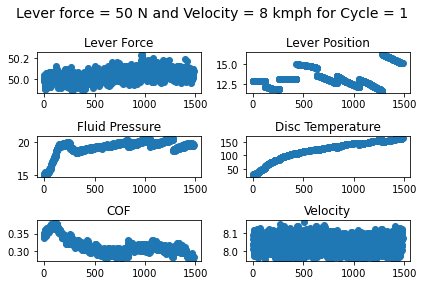

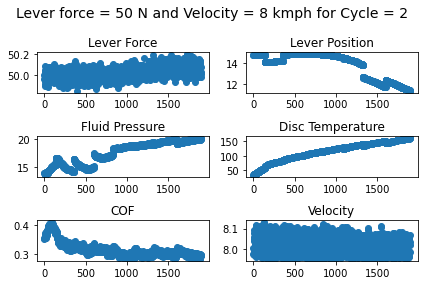

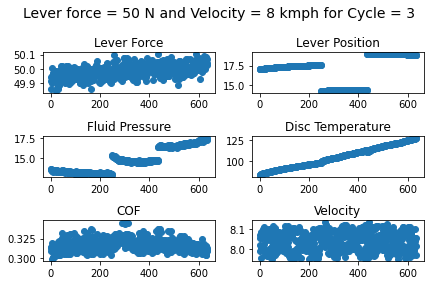

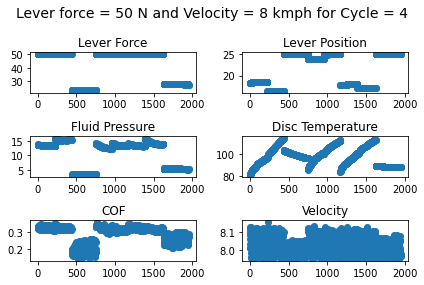

In [106]:
i = 7

# Setting up the dataframe
data = pd.DataFrame(dict[list(dict.keys())[i]])
data.reset_index(drop = True, inplace = True)

emt,cycle_idx = cycle_split(data)

# Data Split into Cycle index
cycle_idx = [x+1 for x in cycle_idx] 
lst  = [0] + cycle_idx + [len(data)]

# Plotting Function
cycle_plot(data,lst)